In [1]:
import boto3
import awswrangler as wr
import pandas as pd
accessKeys = pd.read_csv("../../quant-bears_accessKeys.csv")
session = boto3.Session(
	aws_access_key_id=accessKeys.loc[0, "Access key ID"],
	aws_secret_access_key=accessKeys.loc[0, "Secret access key"]
)

s3_collection_path = "s3://quant-bears-data-collection/raw-data/seekingAlpha.seekingAlphaBulkMetrics/"

In [2]:
df_2023_09_19 = wr.s3.read_parquet(s3_collection_path + "2023-09-19.parquet", boto3_session=session)
df_2023_09_26 = wr.s3.read_parquet(s3_collection_path + "2023-09-26.parquet", boto3_session=session)


In [3]:
df_2023_09_19.head()

,ticker,altman_z_score,analysts_down,analysts_down_percent,analysts_down_percent_avg_5y,analysts_up,analysts_up_percent,analysts_up_percent_avg_5y,assets_turnover,assets_turnover_avg_5y,...,total_debt,total_revenue,working_cap_change,working_cap_change_avg_5y,yld_on_cost_1y,yld_on_cost_1y_avg_5y,yld_on_cost_3y,yld_on_cost_3y_avg_5y,yld_on_cost_5y,yld_on_cost_5y_avg_5y
0,AA,1.401235,9.0,100.000000,60.255886,0.0,0.000000,39.744114,0.728491,0.758183,...,1.834000e+09,1.086800e+10,-21.0507,20.532969,0.942063,NaN,3.003003,NaN,0.927644,NaN
1,AAP,2.266178,14.0,100.000000,38.802917,0.0,0.000000,61.197083,0.917976,0.930908,...,4.596040e+09,1.121875e+10,54.5253,-10.475822,2.847722,1.203241,3.086821,1.558655,2.833284,1.804696
2,ABCL,5.648530,1.0,14.285714,39.515347,6.0,85.714290,60.484653,0.092735,0.414523,...,8.403200e+07,1.451750e+08,-12.0268,2262.069600,NaN,NaN,NaN,NaN,NaN,NaN
3,ABCM,6.937922,1.0,25.000000,NaN,3.0,75.000000,NaN,0.363036,0.364674,...,2.755801e+08,4.822016e+08,23.8888,25.863136,NaN,NaN,NaN,NaN,NaN,NaN
4,ABEV,4.510405,2.0,66.666664,47.094288,1.0,33.333332,52.905710,0.612834,0.542864,...,8.554309e+08,1.727274e+10,-95.3390,116.744484,5.098481,3.130066,6.037113,2.510408,3.164189,1.532657


In [4]:
df_2023_09_26.head()

,ticker,altman_z_score,analysts_down,analysts_down_percent,analysts_down_percent_avg_5y,analysts_up,analysts_up_percent,analysts_up_percent_avg_5y,assets_turnover,assets_turnover_avg_5y,...,total_debt,total_revenue,working_cap_change,working_cap_change_avg_5y,yld_on_cost_1y,yld_on_cost_1y_avg_5y,yld_on_cost_3y,yld_on_cost_3y_avg_5y,yld_on_cost_5y,yld_on_cost_5y_avg_5y
0,AA,1.401235,7.0,100.000000,60.362130,0.0,0.000000,39.637870,0.728491,0.758034,...,1.834000e+09,1.086800e+10,-21.0507,20.329374,1.126443,NaN,3.463203,NaN,0.969932,NaN
1,AAP,2.266178,15.0,100.000000,39.140030,0.0,0.000000,60.859970,0.917976,0.930220,...,4.596040e+09,1.121875e+10,54.5253,-10.385799,2.959502,1.213778,3.179171,1.570691,2.838872,1.814740
2,ABCL,5.648530,1.0,14.285714,39.313187,6.0,85.714290,60.686813,0.092735,0.412051,...,8.403200e+07,1.451750e+08,-12.0268,2244.603300,NaN,NaN,NaN,NaN,NaN,NaN
3,ABCM,6.937922,2.0,50.000000,NaN,2.0,50.000000,NaN,0.363036,0.364662,...,2.755801e+08,4.822016e+08,23.8888,25.849815,NaN,NaN,NaN,NaN,NaN,NaN
4,ABEV,4.510405,2.0,66.666664,47.227093,1.0,33.333332,52.772907,0.612834,0.543050,...,8.554309e+08,1.727274e+10,-95.3390,116.636320,5.009965,3.142845,6.192575,2.536229,3.185144,1.544216


In [5]:
# Shapes
print(df_2023_09_19.shape)

print(df_2023_09_26.shape)

(1093, 265)
(1104, 265)


In [6]:
# Percentage overlap of screened tickers
overlapped_tickers = df_2023_09_19["ticker"][df_2023_09_19["ticker"].isin(df_2023_09_26["ticker"])]
overlapped_tickers.shape[0] / df_2023_09_19.shape[0]

0.9679780420860018

In [7]:
df_19 = df_2023_09_19.set_index("ticker").loc[overlapped_tickers]
df_26 = df_2023_09_26.set_index("ticker").loc[overlapped_tickers]
assert df_19.shape == df_26.shape, "Shape mismatch"

In [8]:
# Description of autocorrelation between columns
df_19.corrwith(df_26).describe()

count    263.000000
mean       0.986585
std        0.063279
min        0.378230
25%        0.997043
50%        0.999901
75%        0.999994
max        1.000000
dtype: float64

In [9]:
df_19.corrwith(df_26).sort_values()

ev_ebit_fy1                      0.378230
last_price_vs_sma_10d            0.394811
peg_nongaap_fy1                  0.634679
pe_nongaap_fy1                   0.679388
price_cf_ratio_fy1               0.818411
                                   ...   
eps_gaap_annual_growth_yoy       1.000000
sustainable_growth_rate          1.000000
capm_alpha_60m                   1.000000
institutional_ownership_level    1.000000
peg_gaap_avg_5y                       NaN
Length: 264, dtype: float64

In [10]:
# Description of NAs in each column
df_19.isna().sum().describe()

count     264.000000
mean      304.981061
std       277.248436
min         0.000000
25%        48.000000
50%       217.000000
75%       566.250000
max      1057.000000
dtype: float64

In [11]:
# Find main price variable
df_19.columns[df_19.columns.str.contains("price")]

Index(['last_price_vs_sma_100d', 'last_price_vs_sma_10d',
       'last_price_vs_sma_200d', 'last_price_vs_sma_50d',
       'log_of_unadjusted_stock_price', 'price_cf_ratio',
       'price_cf_ratio_avg_5y', 'price_cf_ratio_fy1',
       'price_cf_ratio_fy1_avg_5y', 'price_close_10y', 'price_close_1m',
       'price_close_1w', 'price_close_1y', 'price_close_3y', 'price_close_5y',
       'price_close_6m', 'price_close_adj_10y', 'price_close_adj_1m',
       'price_close_adj_1w', 'price_close_adj_1y', 'price_close_adj_3y',
       'price_close_adj_5y', 'price_close_adj_6m', 'price_close_adj_ytd',
       'price_close_ytd', 'price_high_52w', 'price_low_52w', 'price_return_1y',
       'price_return_3m', 'price_return_6m', 'price_return_9m',
       'primary_price'],
      dtype='object')

In [12]:
price_diff = df_26["primary_price"] - df_19["primary_price"]
price_diff.head()

ticker
AA     -2.220000
AAP    -1.240000
ABCL   -0.360000
ABCM    0.060000
ABEV   -0.092967
Name: primary_price, dtype: float64

In [13]:
price_diff_pct = price_diff / df_19["primary_price"]
price_diff_pct.tail()

ticker
ZNTL   -0.077368
ZS     -0.037164
ZTO    -0.028343
ZUO    -0.036824
ZWS    -0.014565
Name: primary_price, dtype: float64

In [14]:
price_diff_pct.describe()

count    1058.000000
mean       -0.033572
std         0.048261
min        -0.301408
25%        -0.055550
50%        -0.029842
75%        -0.005902
max         0.299906
Name: primary_price, dtype: float64

In [15]:
X = df_19.copy()
X["target"] = price_diff_pct

In [16]:
# What correlates the most with the target variable?
feature_target_corr = X.corr()["target"].sort_values()
feature_target_corr

beta24                            -0.301661
coefficient_of_variation_90d      -0.273251
short_interest_percent_of_float   -0.241841
p_week_vol_shares                 -0.187265
div_payout_gaap_avg_5y            -0.169919
                                     ...   
return_on_avg_tot_assets           0.205067
return_on_total_capital            0.256354
cf_payout_avg_5y                   0.443166
target                             1.000000
peg_gaap_avg_5y                         NaN
Name: target, Length: 265, dtype: float64

In [17]:
feature_target_corr.tail(20)

int_cover                         0.115490
gross_profit                      0.119107
earnings_yield_avg_5y             0.120022
net_income                        0.136344
div_yield_div_payout              0.140661
earn_yield_gaap_fy1_avg_5y        0.143412
div_yield_div_payout_avg_5y       0.144778
return_on_total_capital_avg_5y    0.150472
ebitda_margin                     0.154197
diluted_eps                       0.154245
ebit_margin                       0.155126
levered_fcf_margin                0.157841
earn_yield_gaap_fy1               0.161375
net_lt_debt_tot_assets_avg_5y     0.163731
eps_estimate                      0.191914
return_on_avg_tot_assets          0.205067
return_on_total_capital           0.256354
cf_payout_avg_5y                  0.443166
target                            1.000000
peg_gaap_avg_5y                        NaN
Name: target, dtype: float64

In [18]:
feature_target_corr_spearman = X.corr(method = "spearman")["target"].sort_values()
feature_target_corr_spearman

beta24                            -0.291399
ps_ratio_avg_5y                   -0.224339
ev_12m_sales_ratio_avg_5y         -0.220358
short_interest_percent_of_float   -0.217066
ev_ebit_fy1_avg_5y                -0.212758
                                     ...   
int_cover                          0.323999
return_on_total_capital            0.331165
cf_payout_avg_5y                   0.545320
target                             1.000000
peg_gaap_avg_5y                         NaN
Name: target, Length: 265, dtype: float64

In [19]:
feature_target_corr_spearman.head(20)

beta24                            -0.291399
ps_ratio_avg_5y                   -0.224339
ev_12m_sales_ratio_avg_5y         -0.220358
short_interest_percent_of_float   -0.217066
ev_ebit_fy1_avg_5y                -0.212758
ev_12m_sales_ratio                -0.209231
ev_ebit_fy1                       -0.200193
ev_sales_fy1                      -0.199058
ev_sales_fy1_avg_5y               -0.195333
ev_ebitda_fy1                     -0.192411
ps_ratio_fy1_avg_5y               -0.190669
ps_ratio                          -0.181520
ps_ratio_fy1                      -0.181358
capex_change_avg_5y               -0.180312
revenue_change_display_avg_5y     -0.178451
current_ratio                     -0.177691
ev_ebit_avg_5y                    -0.169803
quick_ratio                       -0.169088
coefficient_of_variation_90d      -0.167828
p_week_vol_shares                 -0.166405
Name: target, dtype: float64

In [25]:
"""
Relatively important feature definitions

POSITIVE CORRELATION:

int_cover: Interest Coverage
cf_payout_avg_5y: Cash Flow Payout Ratio Average 5 years
return_on_avg_tot_assets: Return on Average Total Assets
return_on_total_capital: Return on Total Capital
eps_estimate: Earnings per Share estimate
ebitda: Earnings before Interests, Taxes, Depreciation, and Amoritization
net_income: Net Income
net_inc_per_employee: Net income per employee
tev: Total Enterprise Valuation
total_revenue: Total Revenue
total_cash: Total Cash

NEGATIVE CORRELATION:

beta24: Expected move in stock relative to market (higher beta means more similar to market)
short_interest_percent_of_float: Short Interest Percent
ps_ratio_avg_5y: Price to Sales ratio Average 5 years
net_lt_debt_tot_assets_avg_5y: Net long term debt over total assets (average 5 years)
ev_12m_sales_ratio: Enterprise Value (12 months) to Sales
"""
positive_features = [
	"int_cover", "cf_payout_avg_5y", "return_on_avg_tot_assets", "return_on_total_capital",
	"eps_estimate", "ebitda", "net_income", "net_inc_per_employee", "tev", "total_revenue", "total_cash"]

negative_features = [
	"beta24", "short_interest_percent_of_float", "ps_ratio_avg_5y", "net_lt_debt_tot_assets_avg_5y", "ev_12m_sales_ratio"
]

Text(0.5, 1.0, 'Distribution of pearson correlation with target')

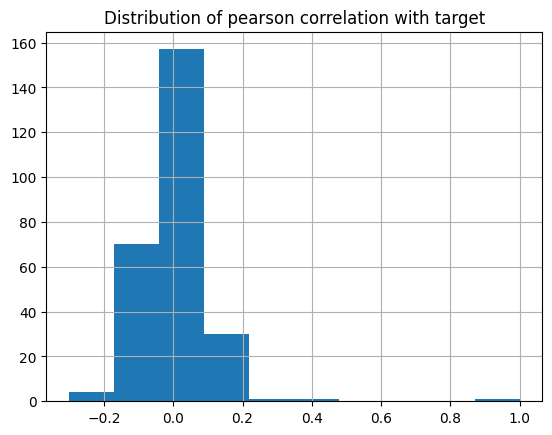

In [23]:
import matplotlib.pyplot as plt
X.corr(method = "pearson")["target"].hist()
plt.title("Distribution of pearson correlation with target")

Text(0.5, 1.0, 'Distribution of spearman correlation with target')

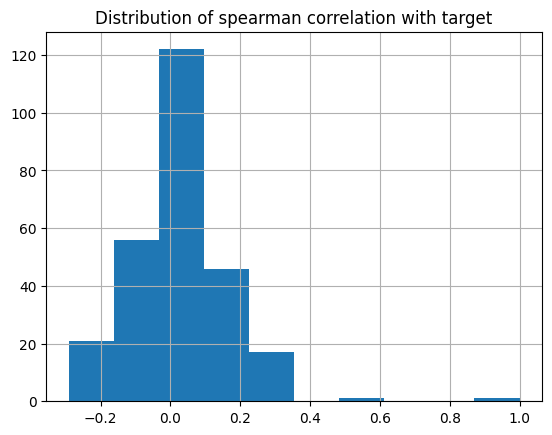

In [24]:
X.corr(method = "spearman")["target"].hist()
plt.title("Distribution of spearman correlation with target")

In [68]:
X.loc["AA", "net_lt_debt_tot_assets_avg_5y"]

3.888923

In [70]:
df_26.loc["AA", "ev_12m_sales_ratio_avg_5y"]

nan

In [73]:
X["ev_12m_sales_ratio_avg_5y"].head()

ticker
AA           NaN
AAP     1.298646
ABCL         NaN
ABCM         NaN
ABEV    3.926235
Name: ev_12m_sales_ratio_avg_5y, dtype: float64

In [74]:
df_26.loc["AAP", "ev_12m_sales_ratio_avg_5y"]

1.2960672

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [70]:
# Get selected features

y = X["target"]
X_ = X[positive_features + negative_features]
# X_ = X[positive_features]


In [71]:
X_norm = normalize(X_.fillna(0.))
X_norm[0, 0:5]

array([-1.89592548e-10,  0.00000000e+00, -7.79233459e-10, -1.41668178e-10,
       -3.54319821e-11])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_.fillna(0.), y, shuffle=True, train_size=.8)

X_train = normalize(X_train)
X_test = normalize(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("Train score:")
print(linreg.score(X_train, y_train))
print("Test score:")
print(linreg.score(X_test, y_test))

Train score:
0.09038178212382131
Test score:
0.1154900895428449


In [86]:
pd.DataFrame(list(zip(X_.columns, linreg.coef_))).sort_values(1, ascending = False)

,0,1
3,return_on_total_capital,3.309172e+05
14,net_lt_debt_tot_assets_avg_5y,2.544758e+05
0,int_cover,5.598109e+02
15,ev_12m_sales_ratio,2.432495e+02
5,ebitda,8.206028e-02
4,eps_estimate,5.508795e-02
10,total_cash,2.408547e-02
9,total_revenue,2.359592e-02
6,net_income,2.157422e-02
8,tev,1.125663e-02


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_.fillna(0.), y, shuffle=True, train_size=.8)

X_train = normalize(X_train)
X_test = normalize(X_test)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

print("Train score:")
print(forest.score(X_train, y_train))
print("Test score:")
print(forest.score(X_test, y_test))

Train score:
0.8577218020161966
Test score:
-0.023358344940318077


In [88]:
pd.DataFrame(list(zip(X_.columns, forest.feature_importances_))).sort_values(1, ascending = False)

,0,1
5,ebitda,0.264377
6,net_income,0.162523
10,total_cash,0.145237
9,total_revenue,0.128283
8,tev,0.119745
7,net_inc_per_employee,0.118841
0,int_cover,0.042674
15,ev_12m_sales_ratio,0.009492
13,ps_ratio_avg_5y,0.008530
14,net_lt_debt_tot_assets_avg_5y,0.000162


In [89]:
# Try as classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [90]:
y_ = np.float32(y > 0.)

X_train, X_test, y_train, y_test = train_test_split(X_.fillna(0.), y_, shuffle=True, train_size=.8)

X_train = normalize(X_train)
X_test = normalize(X_test)

linreg = LogisticRegression()
linreg.fit(X_train, y_train)

print("Train score:")
print(linreg.score(X_train, y_train))
print("Test score:")
print(linreg.score(X_test, y_test))

Train score:
0.8096926713947991
Test score:
0.7735849056603774


In [91]:
pd.DataFrame(list(zip(X_.columns, linreg.coef_[0]))).sort_values(1, ascending = False)

,0,1
9,total_revenue,7.224641e-01
5,ebitda,4.749765e-01
15,ev_12m_sales_ratio,2.773758e-06
3,return_on_total_capital,4.984226e-08
1,cf_payout_avg_5y,-4.043711e-09
11,beta24,-6.793539e-09
14,net_lt_debt_tot_assets_avg_5y,-1.081275e-08
12,short_interest_percent_of_float,-5.768169e-08
2,return_on_avg_tot_assets,-1.854912e-07
0,int_cover,-4.123948e-05


In [93]:
y_ = np.float32(y > 0.)

X_train, X_test, y_train, y_test = train_test_split(X_.fillna(0.), y_, shuffle=True, train_size=.8)

X_train = normalize(X_train)
X_test = normalize(X_test)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

print("Train score:")
print(forest.score(X_train, y_train))
print("Test score:")
print(forest.score(X_test, y_test))

Train score:
1.0
Test score:
0.7547169811320755


In [94]:
pd.DataFrame(list(zip(X_.columns, forest.feature_importances_))).sort_values(1, ascending=False)

,0,1
10,total_cash,0.178994
9,total_revenue,0.169924
6,net_income,0.162898
5,ebitda,0.149967
7,net_inc_per_employee,0.143170
8,tev,0.142002
0,int_cover,0.033997
13,ps_ratio_avg_5y,0.010508
15,ev_12m_sales_ratio,0.007019
2,return_on_avg_tot_assets,0.001318


In [79]:
feature_target_corr["total_cash"]

0.07075762886163683